In [6]:
import time
import numpy
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Input, Conv2DTranspose, Activation
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Convolution2D, Input, Convolution2DTranspose, Activation, add, concatenate
from keras.optimizers import adam
#import prepare_data as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [7]:
def Res_block():
    _input = Input(shape=(None, None, 64))
    conv = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(_input)
    conv = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='linear')(conv)
    out = add(inputs=[_input, conv])
    out = Activation('relu')(out)
    model = Model(inputs=_input, outputs=out)
    return model

In [8]:
_input = Input(shape=(None, None, 1), name='input')
Feature = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(_input)
Feature_out = Res_block()(Feature)
#Upsampling
Upsampling1 = Conv2D(filters=4, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu')(Feature_out)
Upsampling2 = Conv2DTranspose(filters=4, kernel_size=(14, 14), strides=(2, 2),
                                  padding='same', activation='relu')(Upsampling1)
Upsampling3 = Conv2D(filters=64, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu')(Upsampling2)
# Mulyi-scale Reconstruction
Reslayer1 = Res_block()(Upsampling3)
Reslayer2 = Res_block()(Reslayer1)
# ***************//
Multi_scale1 = Conv2D(filters=16, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu')(Reslayer2)
Multi_scale2a = Conv2D(filters=16, kernel_size=(1, 1), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale1)
Multi_scale2b = Conv2D(filters=16, kernel_size=(1, 3), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale1)
Multi_scale2b = Conv2D(filters=16, kernel_size=(3, 1), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale2b)

Multi_scale2c = Conv2D(filters=16, kernel_size=(1, 3), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale1)
Multi_scale2c = Conv2D(filters=16, kernel_size=(3, 1), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale2c)

Multi_scale2d = Conv2D(filters=16, kernel_size=(1, 7), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale1)
Multi_scale2d = Conv2D(filters=16, kernel_size=(7, 1), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale2d)

Multi_scale2e = Conv2D(filters=16, kernel_size=(1, 7), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale1)
Multi_scale2e = Conv2D(filters=16, kernel_size=(1,7), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale2e)

Multi_scale2f = Conv2D(filters=16, kernel_size=(1, 7), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale1)
Multi_scale2f = Conv2D(filters=16, kernel_size=(7,1), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale2f)

Multi_scale2g = Conv2D(filters=16, kernel_size=(1, 7), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale1)
Multi_scale2g = Conv2D(filters=16, kernel_size=(1,9), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale2g)

Multi_scale2 = concatenate(inputs=[Multi_scale2a, Multi_scale2b, Multi_scale2c, Multi_scale2d,Multi_scale2e, Multi_scale2f, Multi_scale2g])

out = Conv2D(filters=1, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu')(Multi_scale2)
model = Model(input=_input, output=out)

TypeError: ('Keyword argument not understood:', 'input')

In [ ]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
model.summary()

NameError: name 'model' is not defined

In [10]:
from keras.utils import plot_model
plot_model(model, to_file='wazirmodel.png')

NameError: name 'model' is not defined

In [11]:
def Res_block():
    _input = Input(shape=(None, None, 64))

    conv = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(_input)
    conv = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='linear')(conv)

    out = add(inputs=[_input, conv])
    out = Activation('relu')(out)

    model = Model(inputs=_input, outputs=out)

    return model


def model_WAZIR():
    _input = Input(shape=(None, None, 1), name='input')

    Feature = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu')(_input)
    Feature_out = Res_block()(Feature)

    #Upsampling
    Upsampling1 = Conv2D(filters=4, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu')(Feature_out)
    Upsampling2 = Conv2DTranspose(filters=4, kernel_size=(14, 14), strides=(2, 2),
                                  padding='same', activation='relu')(Upsampling1)

                           
    Upsampling3 = Conv2D(filters=64, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu')(Upsampling2)

    

    # Mulyi-scale Reconstruction
    Reslayer1 = Res_block()(Upsampling3)

    Reslayer2 = Res_block()(Reslayer1)

    # ***************//
    Multi_scale1 = Conv2D(filters=16, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu')(Reslayer2)

    Multi_scale2a = Conv2D(filters=16, kernel_size=(1, 1), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale1)

    Multi_scale2b = Conv2D(filters=16, kernel_size=(1, 3), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale1)
    Multi_scale2b = Conv2D(filters=16, kernel_size=(3, 1), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale2b)

    Multi_scale2c = Conv2D(filters=16, kernel_size=(1, 3), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale1)
    Multi_scale2c = Conv2D(filters=16, kernel_size=(3, 1), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale2c)

    Multi_scale2d = Conv2D(filters=16, kernel_size=(1, 7), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale1)
    Multi_scale2d = Conv2D(filters=16, kernel_size=(7, 1), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale2d)

    Multi_scale2e = Conv2D(filters=16, kernel_size=(1, 7), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale1)
    Multi_scale2e = Conv2D(filters=16, kernel_size=(1,7), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale2e)

    
    Multi_scale2f = Conv2D(filters=16, kernel_size=(1, 7), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale1)
    Multi_scale2f = Conv2D(filters=16, kernel_size=(7,1), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale2f)

    Multi_scale2g = Conv2D(filters=16, kernel_size=(1, 7), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale1)
    Multi_scale2g = Conv2D(filters=16, kernel_size=(1,9), strides=(1, 1),
                           padding='same', activation='relu')(Multi_scale2g)

    Multi_scale2 = concatenate(inputs=[Multi_scale2a, Multi_scale2b, Multi_scale2c, Multi_scale2d,Multi_scale2e, Multi_scale2f, Multi_scale2g])

    out = Conv2D(filters=1, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu')(Multi_scale2)
    model = Model(input=_input, output=out)

    return model


def WAZIR_train():
    WAZIR = model_WAZIR()
    WAZIR.compile(optimizer=adam(lr=0.0003), loss='mse')
    #WAZIR.summary()
    #SVG(model_to_dot(WAZIR, show_shapes=True).create(prog='dot', format='svg'))
    #data, label = pd.read_training_data("./scale2.h5")
    #WAZIR.fit(data, label, batch_size=56, nb_epoch=1)
    #WAZIR.save_weights("WAZIR_MODEL_SCALE_2A.h5")


def WAZIR_predict():
    WAZIR = model_WAZIR()
    WAZIR.load_weights("WAZIR_MODEL_SCALE_2.h5")
    IMG_NAME = "Set5/baby_GT.bmp"
    #IMG_NAME = "/home/wazir/Desktop/AJARN PRESENTATION/Set14/zebra.png"
    INPUT_NAME = "INPUT_LOW_RESOLUTION_IMAGE.bmp"
    OUTPUT_NAME = "MODEL_OUTPUT_IMAGE.bmp"
   

    import cv2
    img = cv2.imread(IMG_NAME)
    shape = img.shape
    img = cv2.resize(img, (shape[1] // 2, shape[0] // 2), cv2.INTER_CUBIC)
    cv2.imwrite(INPUT_NAME, img)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    Y = numpy.zeros((1, img.shape[0], img.shape[1], 1))
    Y[0, :, :, 0] = img[:, :, 0]
    img = cv2.resize(img, (shape[1], shape[0]), cv2.INTER_CUBIC)

    pre = WAZIR.predict(Y, batch_size=1)
    pre[pre[:] > 255] = 255
    pre = pre.astype(numpy.uint8)
    img[:, :, 0] = pre[0, :, :, 0]
    img = cv2.cvtColor(img, cv2.COLOR_YCrCb2BGR)
    cv2.imwrite(OUTPUT_NAME, img)

    # psnr calculation:
    im1 = cv2.imread(IMG_NAME, cv2.IMREAD_COLOR)
    im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2YCrCb)
    im2 = cv2.imread(INPUT_NAME, cv2.IMREAD_COLOR)
    im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2YCrCb)
    im2 = cv2.resize(im2, (img.shape[1], img.shape[0]))
    im3 = cv2.imread(OUTPUT_NAME, cv2.IMREAD_COLOR)
    im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2YCrCb)

    #print ("Bicubic:")
    #print (cv2.PSNR(im1, im2))
    print ("WAZIR_MODEL:")
    print (cv2.PSNR(im1, im3))


#if __name__ == "__main__":
WAZIR_train()
WAZIR_predict()

TypeError: ('Keyword argument not understood:', 'input')

In [5]:
GT_IMAGE = Image.open("Set5/baby_GT.bmp")
LR_IMAGE = Image.open("./INPUT_LOW_RESOLUTION_IMAGE.bmp")
MODEL_IMAGE = Image.open("./MODEL_OUTPUT_IMAGE.bmp")

FileNotFoundError: [Errno 2] No such file or directory: './INPUT_LOW_RESOLUTION_IMAGE.bmp'

C:\Users\user\anaconda3\envs\gputest1\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  
C:\Users\user\anaconda3\envs\gputest1\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  import sys


NameError: name 'LR_IMAGE' is not defined

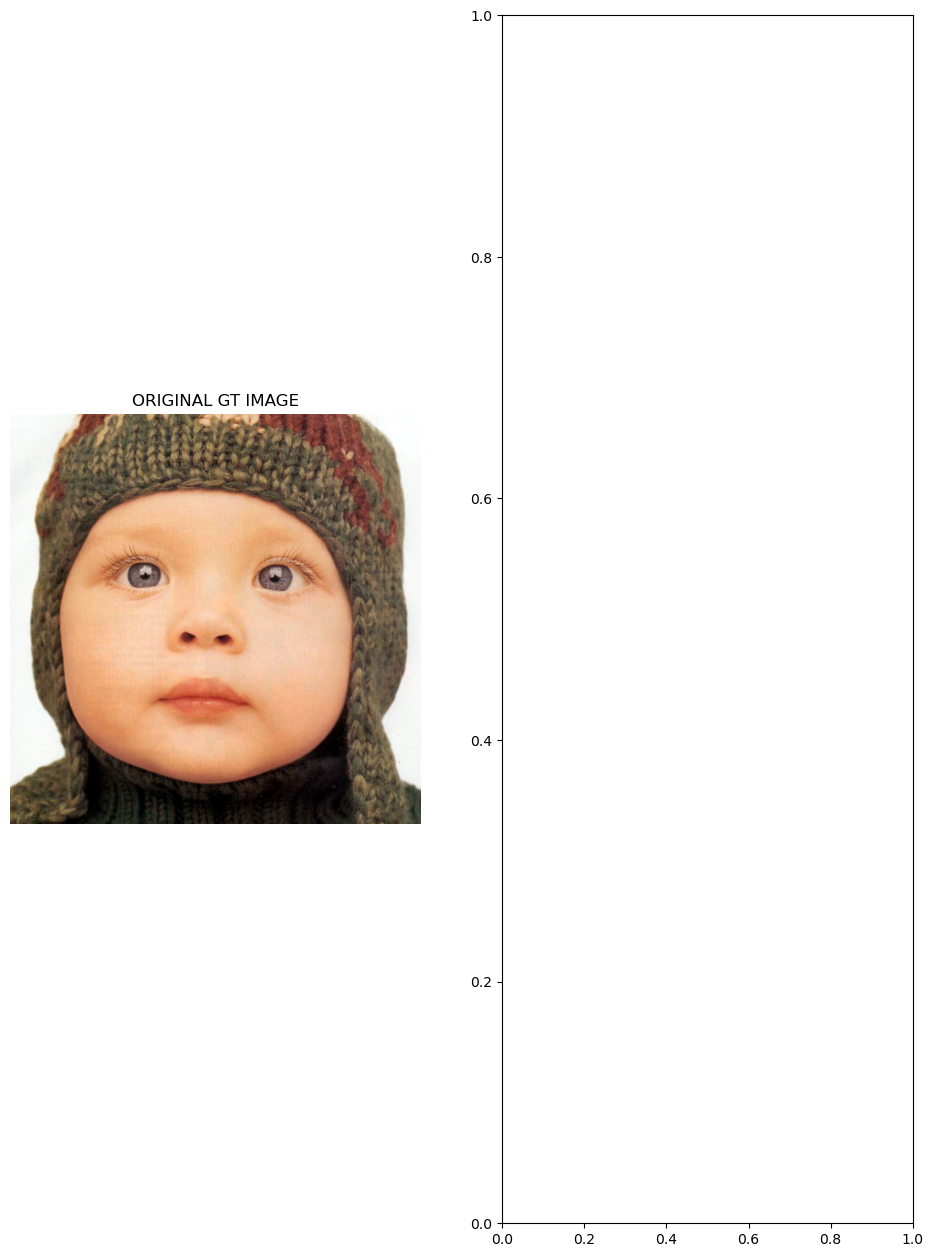

In [6]:
fig = plt.figure(figsize =(18,16),dpi=100)
ax = plt.subplot("131")
ax.imshow(GT_IMAGE)
ax.set_title('ORIGINAL GT IMAGE')
plt.axis('off')

ax = plt.subplot("132")
ax.imshow(LR_IMAGE)
ax.set_title('LR IMAGE IMAGE')
plt.axis('off')

ax = plt.subplot("133")
ax.imshow(MODEL_IMAGE)
ax.set_title('WAZIR MODEL PREDICTED HR IMAGE')
plt.axis('off')